In [16]:
import torch
import matplotlib.pyplot as plt
path_Gs_G0 = '/home/jiahang/DiGress/chain_results/2024-05-02/07-54-50-protein-3/protein-3/test/Gs_G0.pkl'
path_Gs_Gt = '/home/jiahang/DiGress/chain_results/2024-05-02/07-54-50-protein-3/protein-3/test/Gs_Gt.pkl'
path_Gs_Gt_infer = '/home/jiahang/DiGress/chain_results/2024-05-02/07-54-50-protein-3_infer/protein-3_infer/infer/Gs_Gt.pkl'

In [11]:
import matplotlib.pyplot as plt

In [2]:
import pickle
with open(path_Gs_G0, 'rb') as f:
    Gs_G0 = pickle.load(f)
with open(path_Gs_Gt, 'rb') as f:
    Gs_Gt = pickle.load(f)

In [18]:
with open(path_Gs_Gt_infer, 'rb') as f:
    Gs_Gt_infer = pickle.load(f)

In [3]:
def process_dist(dist):
    step_dist_list = []
    for step_idx in range(dist[0].shape[0]):
        _step_dist_list = []
        for batch in dist:
            _step_dist_list.append(batch[step_idx])
        _step_dist_list = torch.concat(_step_dist_list)
        step_dist_list.append(_step_dist_list)
    step_dist = torch.stack(step_dist_list)
    return step_dist.numpy()
Gs_G0_step_dist = process_dist(Gs_G0)
Gs_Gt_step_dist = process_dist(Gs_Gt)

In [20]:
Gs_Gt_infer_step_dist = process_dist(Gs_Gt_infer)

In [6]:
def draw_step_dist(step_dist, name, x_range=[0, 1]):
    fig, axs = plt.subplots(2, 5, sharey=True, tight_layout=True, figsize=(15, 5))
    fig.suptitle(f"{name}, from final to initial")
    nbins=30
    # We can set the number of bins with the *bins* keyword argument.
    for i in range(2):
        for j in range(5):
            axs[i][j].hist(step_dist[i*5 + j], bins=nbins)
            axs[i][j].set_xlim(x_range)

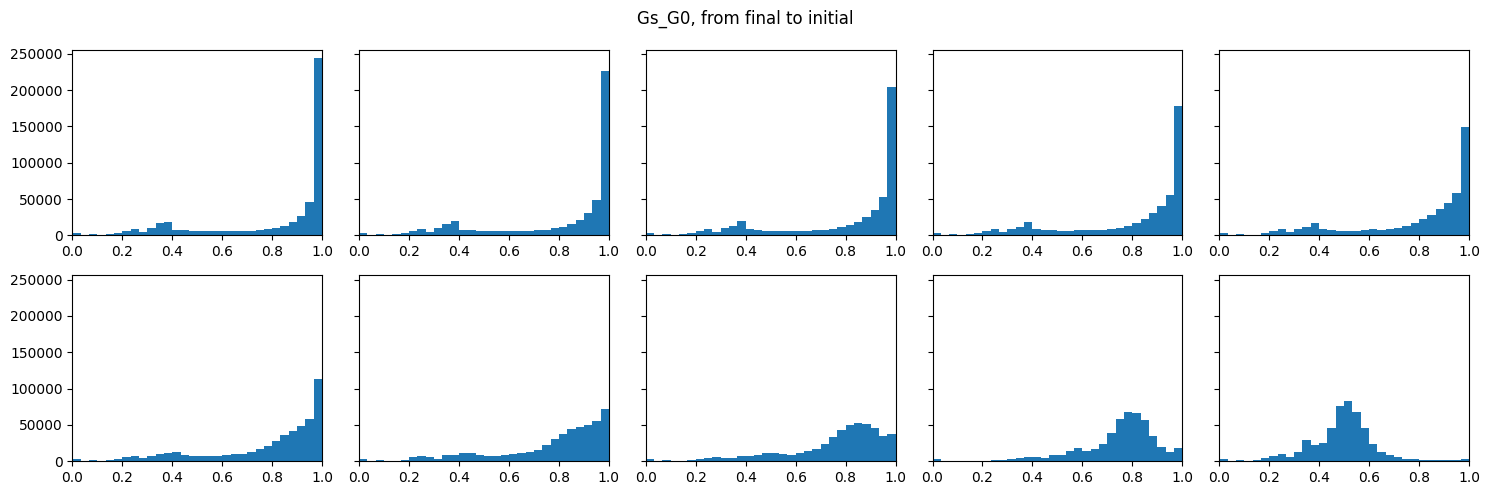

In [7]:
draw_step_dist(Gs_G0_step_dist, 'Gs_G0')

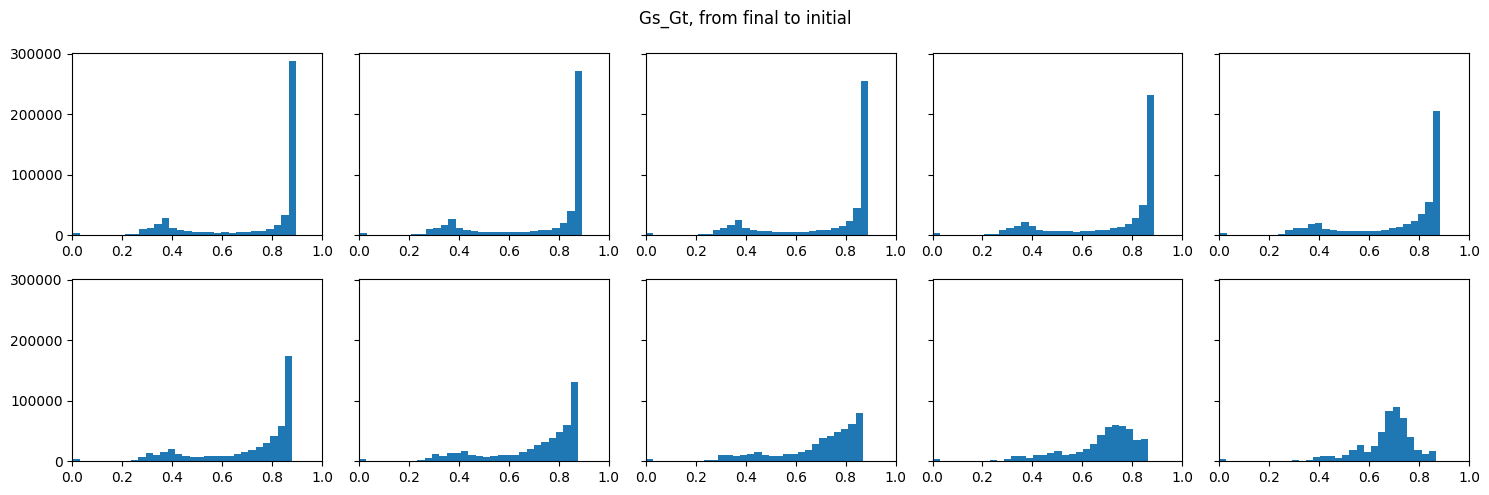

In [8]:
draw_step_dist(Gs_Gt_step_dist, 'Gs_Gt')

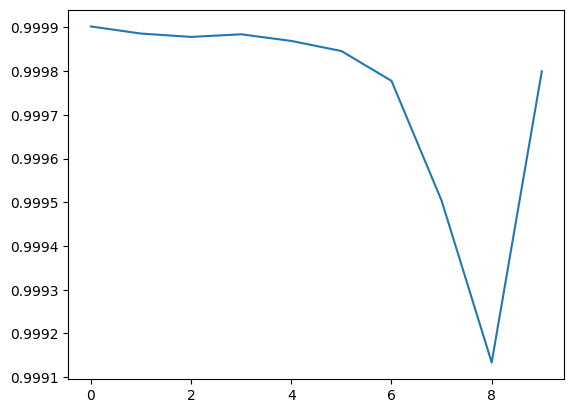

In [12]:
from sklearn.metrics import roc_auc_score, roc_curve
auroc_list = []
for i in range(10):
    auroc = roc_auc_score(Gs_G0_step_dist[i] > 0.5, Gs_Gt_step_dist[i])
    auroc_list.append(auroc)
plt.plot(auroc_list)

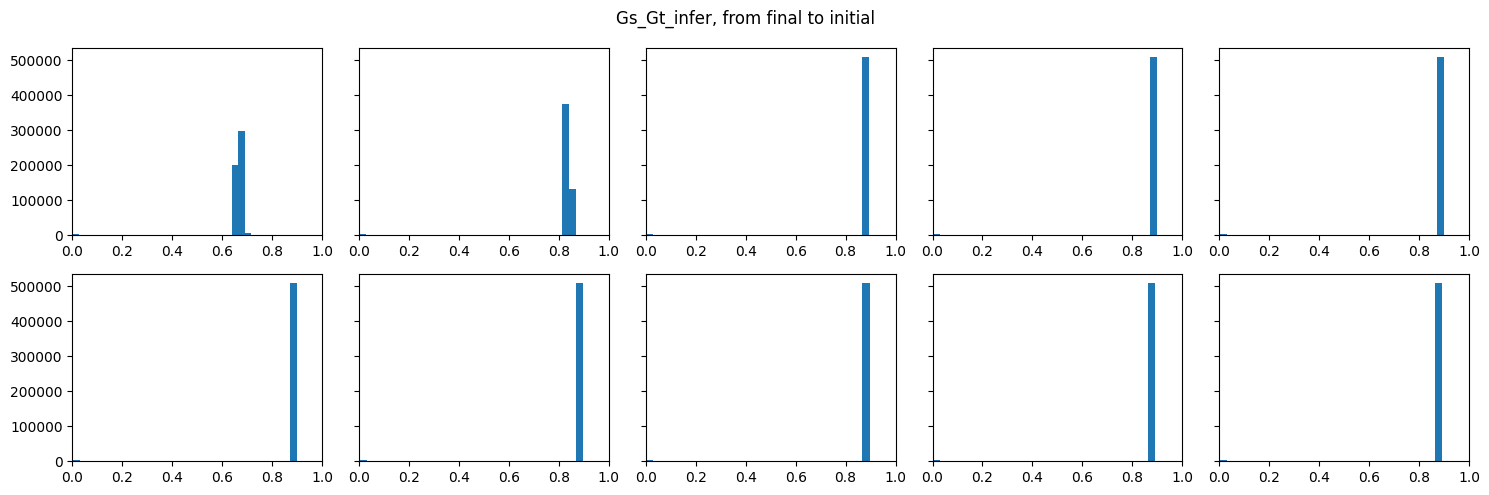

In [21]:
draw_step_dist(Gs_Gt_infer_step_dist, 'Gs_Gt_infer')